In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance_data= pd.read_csv('insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\infinity\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


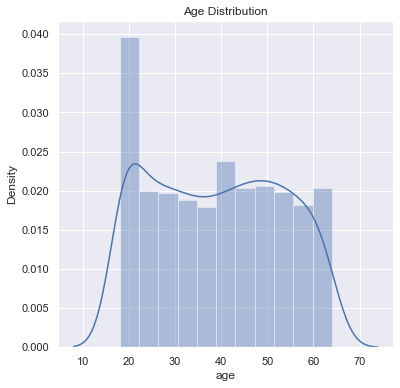

In [8]:
# Distrubution of the dataset
sns.set()

plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

C:\Users\infinity\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


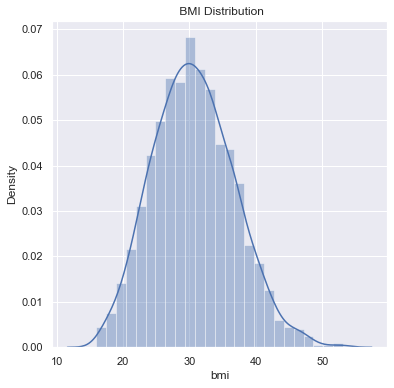

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title(' BMI Distribution')
plt.show()

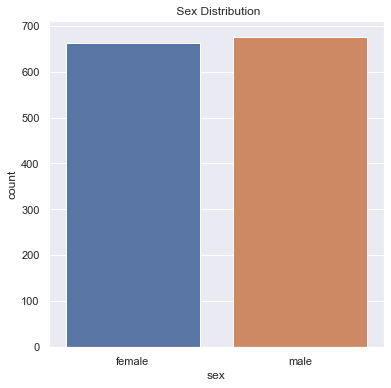

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title(' Sex Distribution')
plt.show()

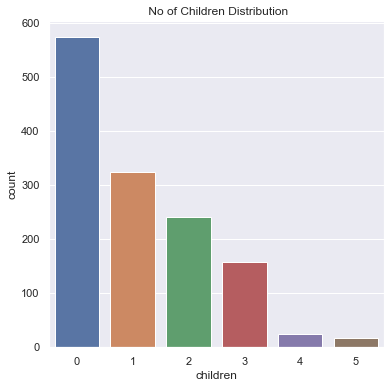

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title(' No of Children Distribution')
plt.show()

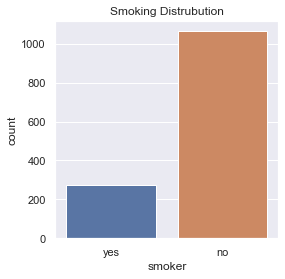

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoking Distrubution')
plt.show()

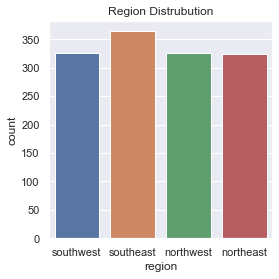

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(x='region', data=insurance_data)
plt.title('Region Distrubution')
plt.show()

C:\Users\infinity\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


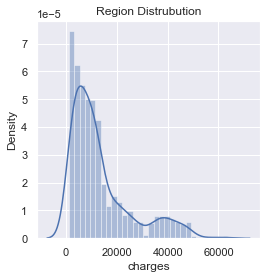

In [15]:
plt.figure(figsize=(4,4))
sns.distplot(insurance_data['charges'])
plt.title('Region Distrubution')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
insurance_data['sex']= le.fit_transform(insurance_data['sex'])
insurance_data['smoker']= le.fit_transform(insurance_data['smoker'])
insurance_data['region']= le.fit_transform(insurance_data['region'])


In [24]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
x= insurance_data.drop(columns='charges', axis=1)
y= insurance_data['charges']

In [26]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(x, y, test_size=0.2, random_state=2)

In [27]:
print('shape of Xtrain:', Xtrain.shape)
print('shape of Ytrain:', Ytrain.shape)
print('shape of Xtest:', Xtest.shape)
print('shape of Ytest:', Ytest.shape)

shape of Xtrain: (1070, 6)
shape of Ytrain: (1070,)
shape of Xtest: (268, 6)
shape of Ytest: (268,)


In [28]:
model= LinearRegression()
model.fit(Xtrain, Ytrain)

LinearRegression()

In [29]:
ytrain_pred= model.predict(Xtrain)
ytest_pred = model.predict(Xtest)

In [30]:
TrainingData_r2_score= metrics.r2_score(Ytrain, ytrain_pred)
TestData_r2_score= metrics.r2_score(Ytest, ytest_pred)

print('The r2 Error score on Training data is:',TrainingData_r2_score )
print('The r2 Error score on Test data is:',TestData_r2_score )

The r2 Error score on Training data is: 0.7519923667088932
The r2 Error score on Test data is: 0.7445422986536503


In [32]:
TrainingData_MAE= metrics.mean_absolute_error(Ytrain, ytrain_pred)
TestData_MAE= metrics.mean_absolute_error(Ytest, ytest_pred)
print('The Mean Absolute Error  on Training data is:',TrainingData_MAE )
print('The Mean Absolute Error  on Test data is:',TestData_MAE )

The Mean Absolute Error  on Training data is: 4140.028379854145
The Mean Absolute Error  on Test data is: 4285.219437633698


###  Making a Predictive Model

In [34]:
input= (60,1,36.005,0,0,3)
input= np.asarray(input)
input=input.reshape(1,-1)

prediction= model.predict(input)
print('The predicted value of the insurance is:', prediction[0])

The predicted value of the insurance is: 14237.291832026262
